# 📝 Relatório de Detecção de Outliers Utilizando DBSCAN

## 🔍 Objetivo
Identificar anomalias e outliers no dataset fornecido, utilizando o algoritmo de clustering baseado em densidade, DBSCAN. A análise será enriquecida com visualizações geradas a partir de uma redução de dimensionalidade com PCA, facilitando a interpretação dos clusters e dos pontos considerados outliers.

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))
print(df.shape)
df.head()


(3100, 17)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.833333,0.019103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.666667,0.126231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.666667,0.178560,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.500000,0.344442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.333333,0.008637,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [3]:
%pip install seaborn
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Dimensões do dataset: (3100, 17)


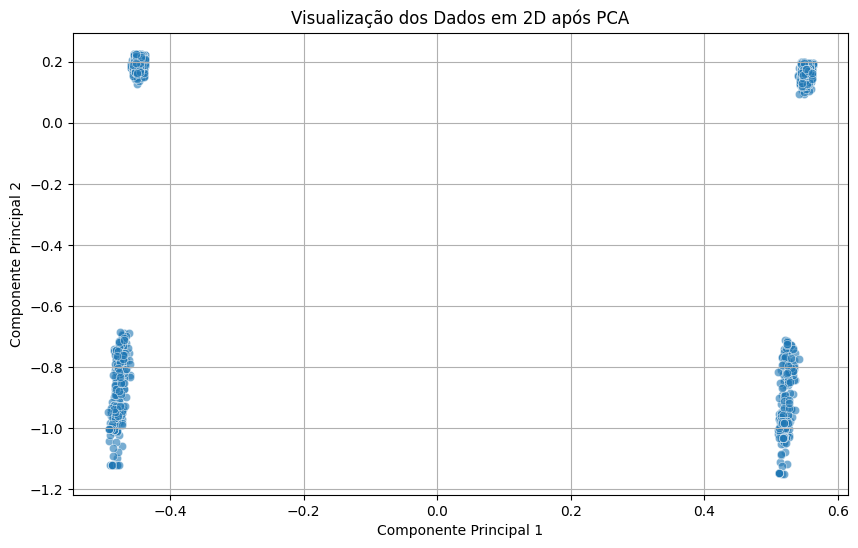

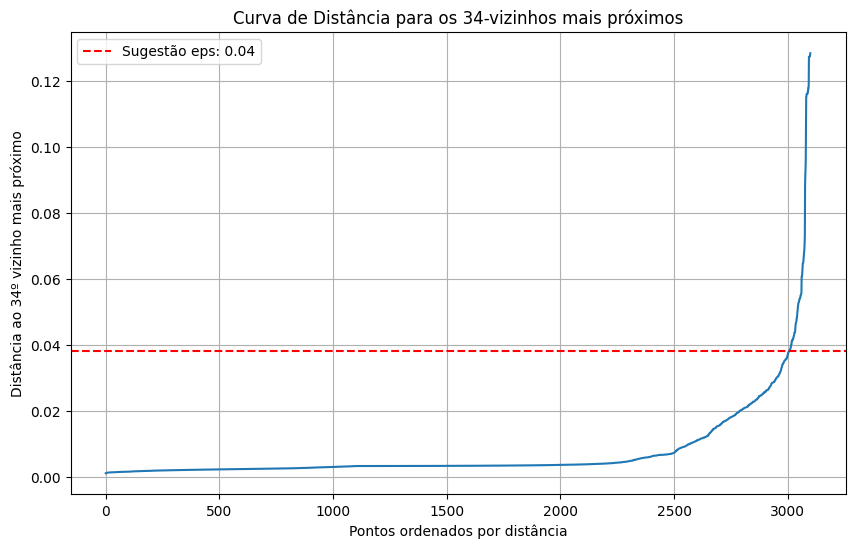


Valor sugerido para eps: 0.0381

Contagem de pontos por cluster:
cluster
-1      31
 0    1173
 1     277
 2    1400
 3      99
 4     120
Name: count, dtype: int64


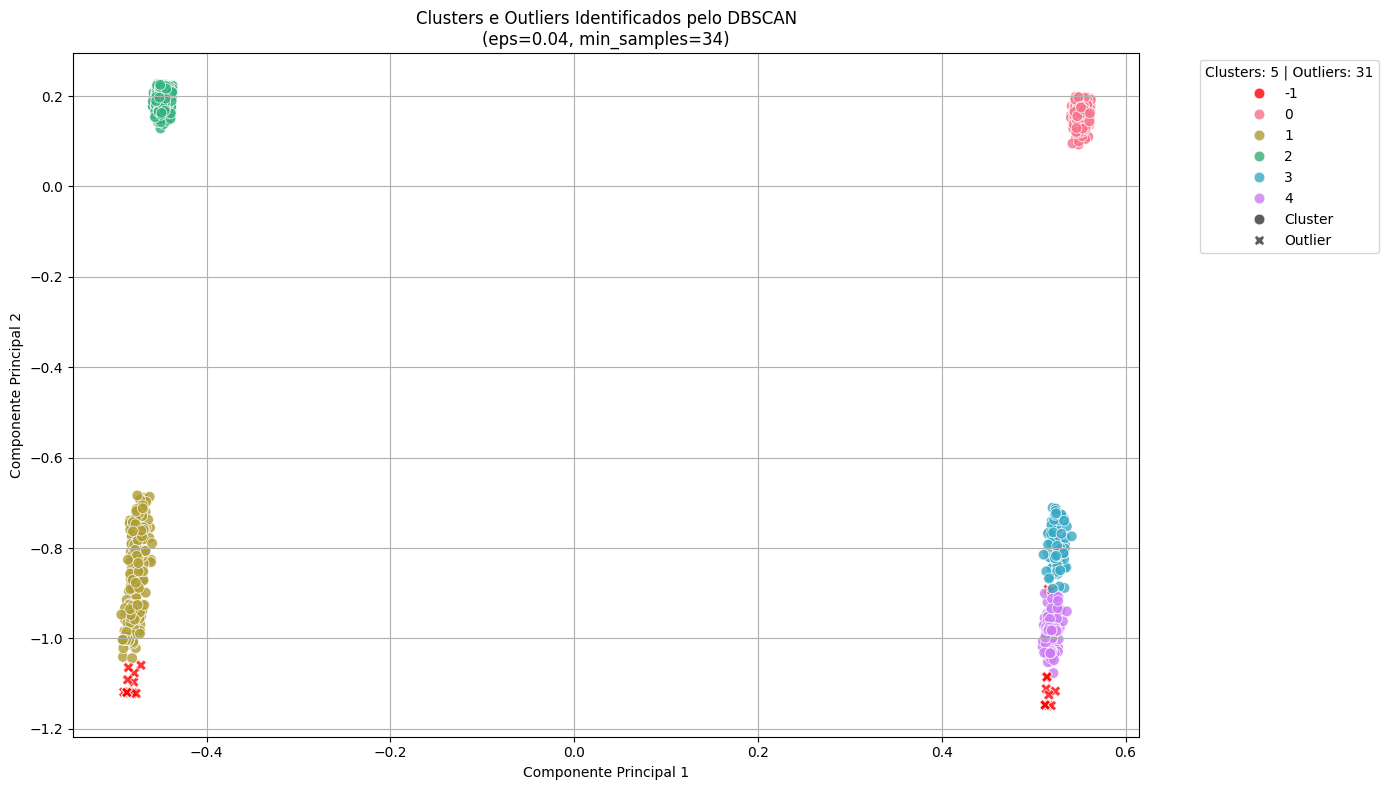


Número de outliers detectados: 31

Estatísticas descritivas dos outliers:
              0          1          2     3     4          5          6   \
count  31.000000  31.000000  31.000000  31.0  31.0  31.000000  31.000000   
mean    0.462366   0.902136   0.451613   0.0   0.0   0.032258   0.032258   
std     0.195835   0.162694   0.505879   0.0   0.0   0.179605   0.179605   
min     0.166667   0.444592   0.000000   0.0   0.0   0.000000   0.000000   
25%     0.333333   0.863932   0.000000   0.0   0.0   0.000000   0.000000   
50%     0.333333   1.000000   0.000000   0.0   0.0   0.000000   0.000000   
75%     0.583333   1.000000   1.000000   0.0   0.0   0.000000   0.000000   
max     1.000000   1.000000   1.000000   0.0   0.0   1.000000   1.000000   

              7     8     9     10    11    12         13    14    15    16  
count  31.000000  31.0  31.0  31.0  31.0  31.0  31.000000  31.0  31.0  31.0  
mean    0.903226   0.0   0.0   0.0   0.0   0.0   0.032258   0.0   0.0   0.0  
std   

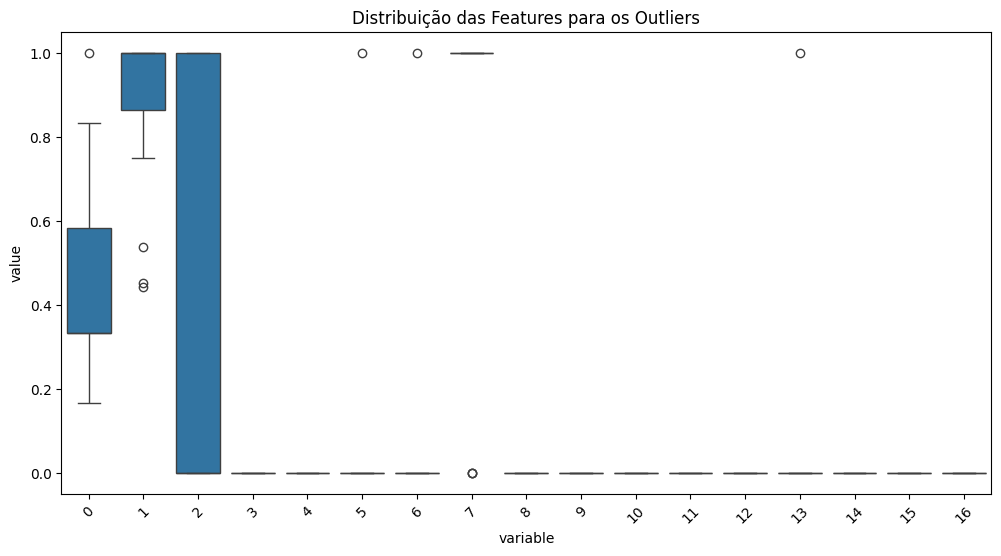

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

# 1. Carregar os dados
df = pd.DataFrame(pd.read_pickle('x_scaled.pickle'))
print("Dimensões do dataset:", df.shape)

# 2. Redução de dimensionalidade com PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

# 3. Visualização inicial após PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', alpha=0.6)
plt.title('Visualização dos Dados em 2D após PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

# 4. Determinação dos parâmetros do DBSCAN (eps)
def find_optimal_eps(data, k=5):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(data)
    distances, _ = nbrs.kneighbors(data)
    distances = np.sort(distances[:, k-1], axis=0)
    
    plt.figure(figsize=(10, 6))
    plt.plot(distances)
    plt.title(f'Curva de Distância para os {k}-vizinhos mais próximos')
    plt.xlabel('Pontos ordenados por distância')
    plt.ylabel(f'Distância ao {k}º vizinho mais próximo')
    plt.grid(True)
    
    # Adicionando linha para sugerir o valor de eps
    eps_suggestion = np.percentile(distances, 97) 
    plt.axhline(y=eps_suggestion, color='r', linestyle='--', 
                label=f'Sugestão eps: {eps_suggestion:.2f}')
    plt.legend()
    
    plt.show()
    
    return eps_suggestion

# Encontrar eps ideal (k=min_samples)
min_samples = 34
eps = find_optimal_eps(df_pca, k=min_samples)
print(f"\nValor sugerido para eps: {eps:.4f}")

# 5. Aplicação do DBSCAN com parâmetros otimizados
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(df_pca)

# Adicionar rótulos ao dataframe PCA
df_pca['cluster'] = clusters

# Contagem de pontos por cluster
cluster_counts = df_pca['cluster'].value_counts().sort_index()
print("\nContagem de pontos por cluster:")
print(cluster_counts)

# 6. Visualização dos clusters e outliers
plt.figure(figsize=(14, 8))

# Criar paleta de cores (outliers em vermelho)
n_clusters = len(cluster_counts) - 1  # Excluindo os outliers (-1)
palette = sns.color_palette("husl", n_clusters)
palette.insert(0, (1, 0, 0))  # Vermelho para outliers

sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', 
                palette=palette, alpha=0.8, s=60, 
                style=df_pca['cluster'].apply(lambda x: 'Outlier' if x == -1 else 'Cluster'),
                markers={'Outlier': 'X', 'Cluster': 'o'})

plt.title(f'Clusters e Outliers Identificados pelo DBSCAN\n(eps={eps:.2f}, min_samples={min_samples})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', 
           title=f'Clusters: {n_clusters} | Outliers: {sum(clusters == -1)}')
plt.grid(True)
plt.tight_layout()
plt.show()

# 7. Análise detalhada dos outliers
if -1 in clusters:
    outliers = df[clusters == -1]
    print(f"\nNúmero de outliers detectados: {len(outliers)}")
    print("\nEstatísticas descritivas dos outliers:")
    print(outliers.describe())
    
    # Visualização da distribuição dos outliers no espaço original
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=outliers.melt(), x='variable', y='value')
    plt.title('Distribuição das Features para os Outliers')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("\nNenhum outlier detectado com os parâmetros atuais.")





In [14]:
from sklearn.cluster import DBSCAN
import numpy as np

# Aplicar DBSCAN com os parâmetros sugeridos
dbscan = DBSCAN(eps=0.0381, min_samples=34)  # Valores otimizados
clusters = dbscan.fit_predict(df_pca)

# Contar clusters e outliers
unique_clusters = np.unique(clusters)
n_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
n_outliers = sum(clusters == -1)

print(f"Clusters encontrados: {n_clusters}")
print(f"Outliers encontrados: {n_outliers}")

# Análise detalhada
print("\nDistribuição dos pontos por cluster:")
for cluster in unique_clusters:
    if cluster == -1:
        print(f"Outliers (cluster -1): {sum(clusters == -1)} pontos")
    else:
        print(f"Cluster {cluster}: {sum(clusters == cluster)} pontos")

Clusters encontrados: 5
Outliers encontrados: 31

Distribuição dos pontos por cluster:
Outliers (cluster -1): 31 pontos
Cluster 0: 1173 pontos
Cluster 1: 277 pontos
Cluster 2: 1400 pontos
Cluster 3: 99 pontos
Cluster 4: 120 pontos
